In [1]:
#Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import textwrap
from scipy.stats import pearsonr
import os
os.chdir("C:/Users/Eleonora/Desktop/")
df = pd.read_spss("C:/Users/Eleonora/Desktop/Python corr.sav")

In [2]:
pip install Pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [3]:
os.chdir("C:/Users/Eleonora/Desktop/")

In [4]:
df = pd.read_spss("C:/Users/Eleonora/Desktop/Untitled2.sav")

In [5]:
df.columns

Index(['Резилиентност', 'Социјална.поврзаност', 'Психичка.вознемиреност',
       'Психолошка.добросостојба', 'Самоефикасност', 'Обработување.емоции',
       'Изразување.емоции', 'Психичка.оптовареност', 'IADL', 'ADL'],
      dtype='object')

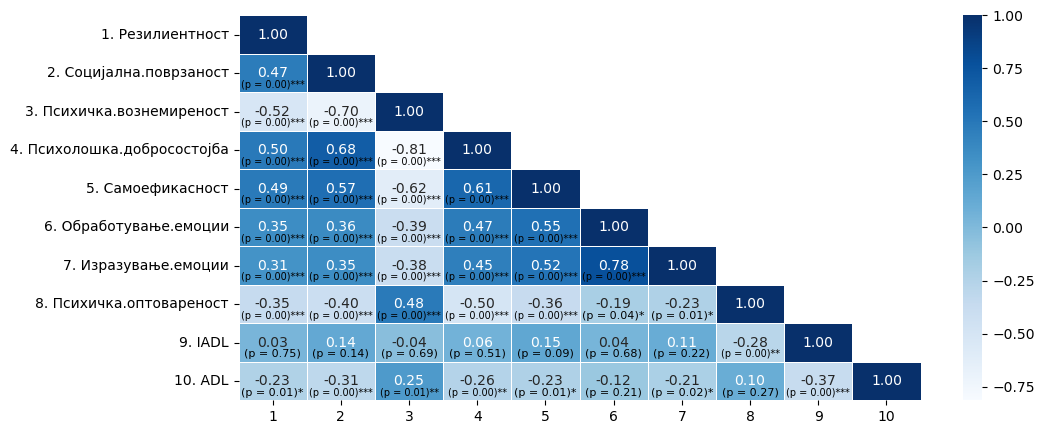

In [6]:
# Correlation matrix 
corr = df.corr(numeric_only=True)

# mask matrix to diagonal
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

fix,ax = plt.subplots(figsize=(11,5))

# Generate heatmap
heatmap = sns.heatmap(corr,
                      annot= True,
                      annot_kws={"fontsize": 10},
                      fmt='.2f',
                      linewidths=0.6,
                      cmap='Blues',
                      mask=mask,
                      ax=ax)

# calculate and format p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
  for j in range(i+1, corr.shape[1]):
    x = df.iloc[:, i]
    y = df.iloc[:, j]
    mask = ~np.logical_or(np.isnan(x), np.isnan(y))
    if np.sum(mask) > 0:
      p_values[i, j] = pearsonr(x[mask], y[mask])[1] #change to pearsonr or spearmanr

# Create a dataframe object for p_values
p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

# Mask the p values
mask_pvalues = np.triu(np.ones_like(p_values), k=1)

# Generate maximum and minimum correlation coefficients for p-value annotation color
max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

# Assign p-values 
for i in range (p_values.shape[0]):
  for j in range(p_values.shape[1]):
    if mask_pvalues[i, j]:
      p_value = p_values.iloc[i, j]
      if not np.isnan(p_value):
        correlation_value = corr.iloc[i, j]
        text_color = 'black' if correlation_value >= (max_corr - 0.4) or correlation_value <= (min_corr + 0.4) else 'black'
        if p_value <= 0.001:
            
            ax.text(i + 0.5, j + 0.8, f'(p = {p_value:.2f})***',
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=7,
                    color=text_color)
        elif p_value <= 0.01:
           
            ax.text(i + 0.5, j + 0.8, f'(p = {p_value:.2f})**',
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=7,
                    color=text_color)
        elif p_value <= 0.05:
           
            ax.text(i + 0.5, j + 0.8, f'(p = {p_value:.2f})*',
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=8,
                    color=text_color)
            
        else:
            ax.text(i + 0.5, j + 0.8, f'(p = {p_value:.2f})',
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=8,
                    color=text_color)

#  x-axis labels 
x_labels = ['1','2','3','4','5','6','7','8','9','10']
ax.set_xticklabels(x_labels, rotation=0, ha="center")

#  y-axis labels
 
y_labels = [f"{i + 1}. {textwrap.fill(label.get_text(), 24)}" for i, label in enumerate(ax.get_yticklabels())]
ax.set_yticklabels(y_labels, rotation=0, ha="right")

# Display 
plt.show()

In [7]:
df = pd.read_spss("C:/Users/Eleonora/Desktop/Untitled2.sav")

C:\Users\Eleonora\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


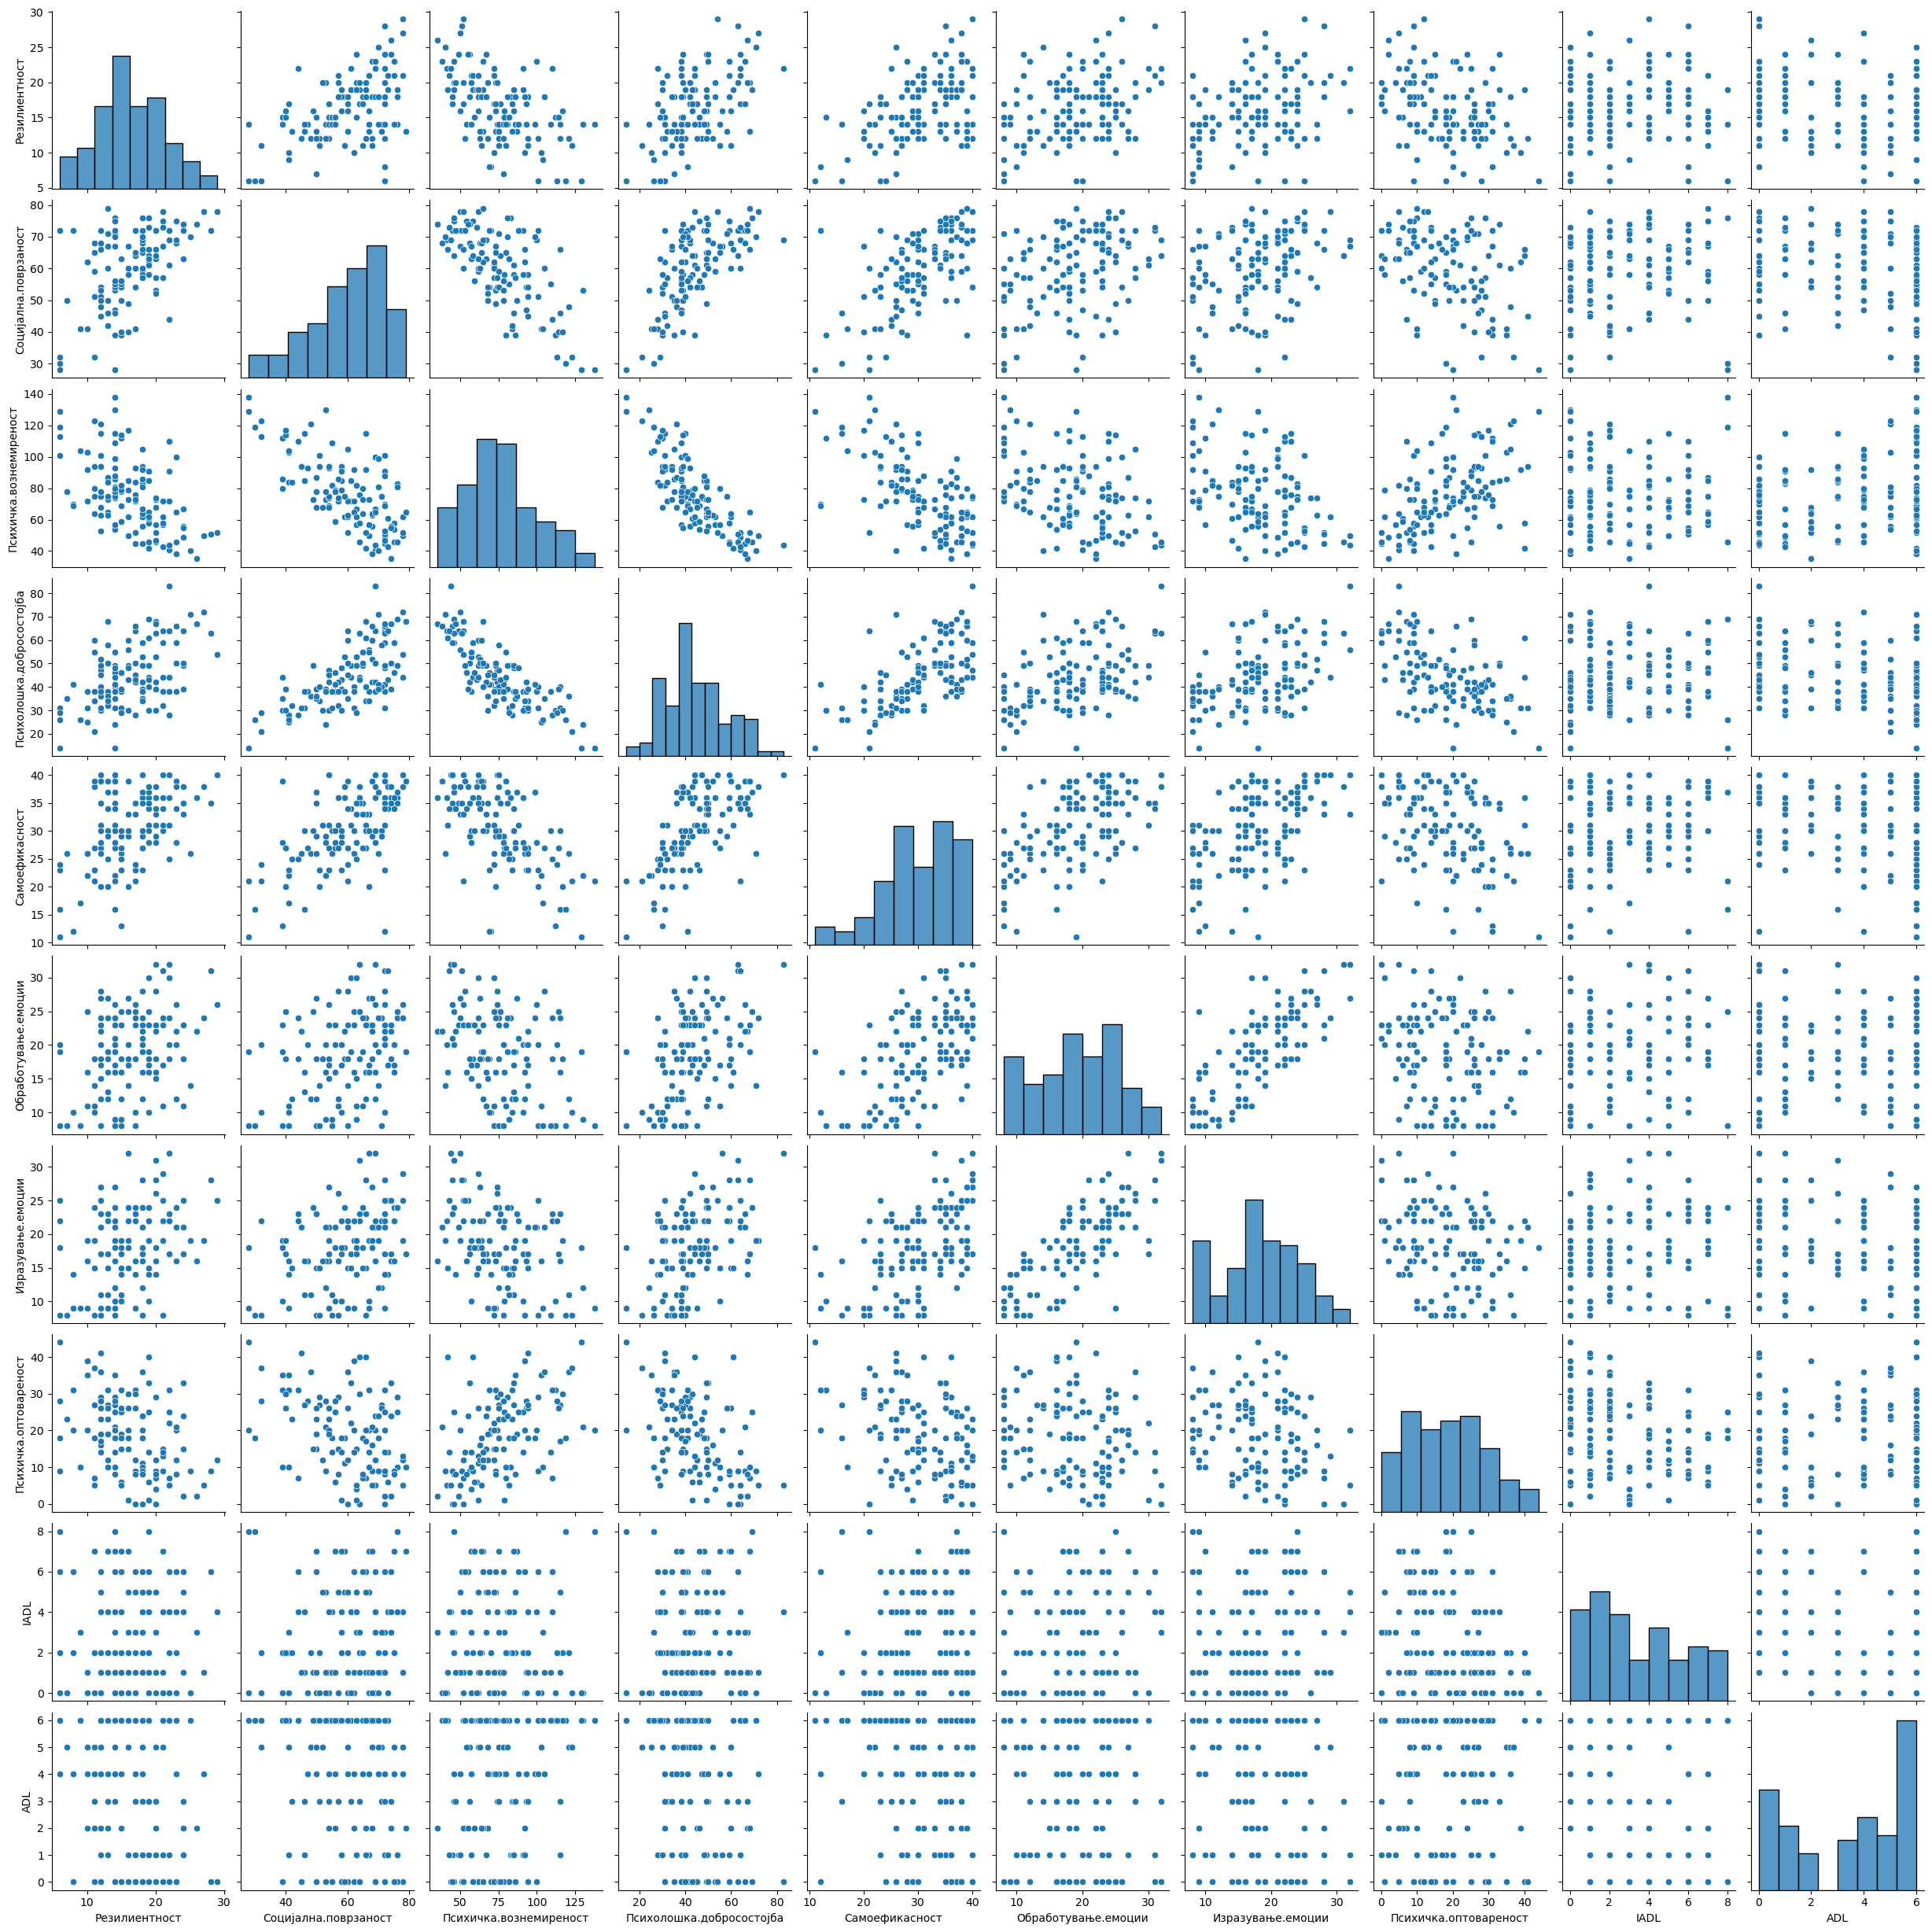

In [8]:
#Scatterplot
sns.pairplot(df)

In [9]:
df = pd.read_spss("C:/Users/Eleonora/Desktop/Python.sav")

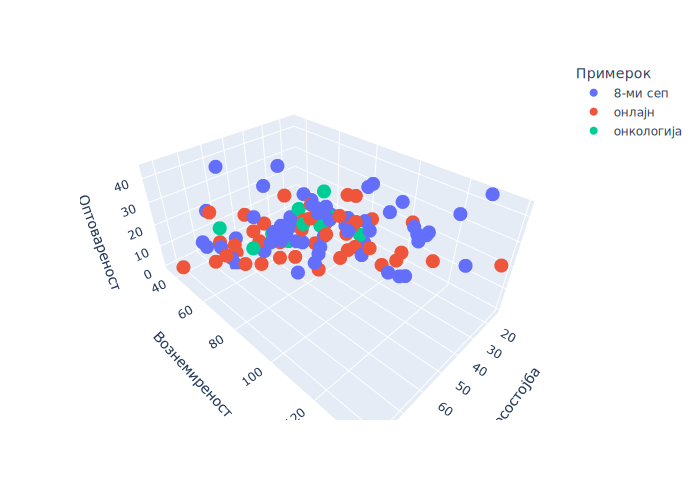

In [10]:
import plotly.express as px
df= pd.read_spss("C:/Users/Eleonora/Desktop/Python.sav")
fig = px.scatter_3d(df, x='Добросостојба', y='Вознемиреност', z='Оптовареност', color='Примерок')
fig.show("svg")

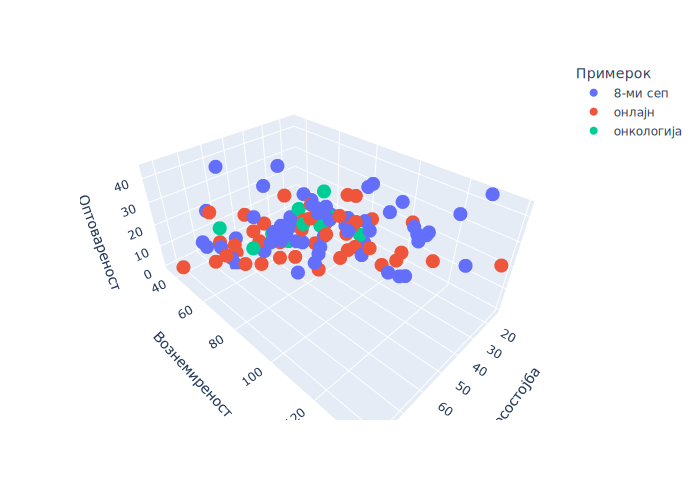

In [11]:
df= pd.read_spss("C:/Users/Eleonora/Desktop/Python.sav")
fig = px.scatter_3d(df, x='Добросостојба', y='Вознемиреност', z='Оптовареност', color='Примерок')
fig.show("svg")

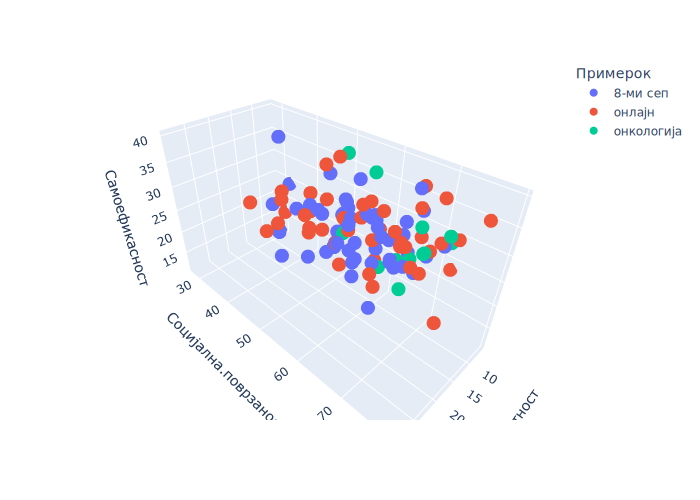

In [12]:
df= pd.read_spss("C:/Users/Eleonora/Desktop/Python.sav")
fig = px.scatter_3d(df, x='Резилиентност', y='Социјална.поврзаност', z='Самоефикасност', color='Примерок')
fig.show("svg")